<a href="https://colab.research.google.com/github/kavmuni/House_price_prediction/blob/main/09112025_House_price_predction_polynomial_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
# importing the required Libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [188]:
house_train = pd.read_csv('train.csv')

In [189]:
# LotArea - No null values
house_train['LotArea'].isnull().sum()

np.int64(0)

In [190]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

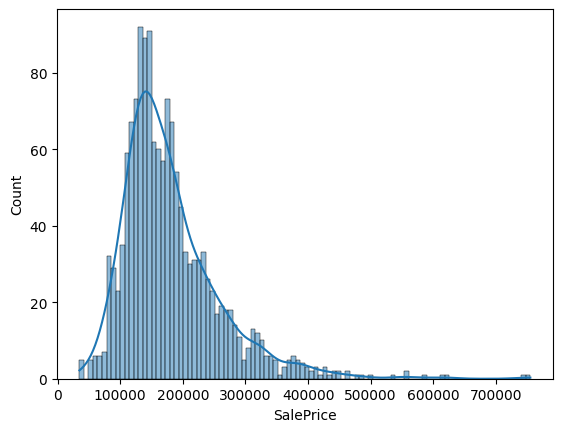

In [191]:
sns.histplot(house_train['SalePrice'], kde=True, bins=100)
# the graph is right/Positive skewed

In [192]:
house_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: xlabel='SalePrice'>

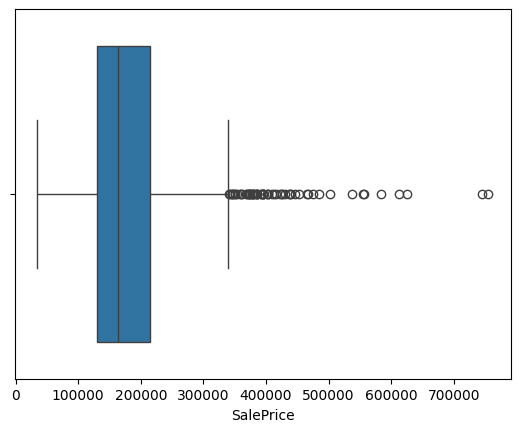

In [193]:
sns.boxplot(house_train['SalePrice'], orient='h')

In [194]:
# LotFrontage - Making the NA/NULL values to some standard values
# MSSubClass, MSZoning, Street - these 3 columns are NOT having the NULL values so using the mean to fill missing values of LotFrontage
# MSSubClass = 190, MSZoning = RL, Street = Grvl - this is th eonly combination and it is NULL. Filling it will global mean of MSSubClass and Street
house_train['LotFrontage'].fillna(house_train.groupby(['MSSubClass', 'MSZoning', 'Street'])['LotFrontage'].transform('mean'), inplace=True)

# This is fo fill the null values which are NOT filled from above step
house_train['LotFrontage'].fillna(house_train.groupby(['MSZoning', 'Street'])['LotFrontage'].transform('mean'), inplace=True)

In [195]:
house_train.groupby(['MSSubClass', 'MSZoning', 'Street'])['LotFrontage'].mean()

MSSubClass  MSZoning  Street
20          C (all)   Grvl       66.000000
                      Pave       50.000000
            FV        Pave       73.583333
            RH        Pave       60.000000
            RL        Grvl       50.000000
                      Pave       78.134146
            RM        Pave       64.800000
30          C (all)   Grvl      120.000000
                      Pave       60.000000
            RH        Pave       70.000000
            RL        Pave       59.535714
            RM        Pave       58.906250
40          RL        Pave       60.000000
            RM        Pave       45.000000
45          RH        Pave       60.000000
            RL        Pave       57.250000
            RM        Pave       53.000000
50          C (all)   Pave       72.750000
            RH        Pave       55.000000
            RL        Pave       67.564103
            RM        Pave       57.244444
60          FV        Pave       76.913043
            RL        Pave       81.621359
            RM        Pave       60.000000
70          C (all)   Pave       50.000000
            RH        Pave       54.500000
            RL        Pave       72.037037
            RM        Pave       60.280000
75          RL        Pave       89.800000
            RM        Pave       71.400000
80          RL        Pave       80.026316
85          RL        Pave       71.571429
90          RH        Pave       74.666667
            RL        Grvl       81.000000
                      Pave       70.648649
            RM        Grvl      110.000000
                      Pave       67.200000
120         FV        Pave       45.600000
            RH        Pave       34.000000
            RL        Pave       47.062500
            RM        Pave       42.083333
160         FV        Pave       30.058824
            RL        Pave       34.700000
            RM        Pave       24.250000
180         RM        Pave       25.200000
190         C (all)   Pave       60.000000
            RH        Pave       60.000000
            RL        Grvl       65.500000
                      Pave       70.857143
            RM        Pave       62.545455
Name: LotFrontage, dtype: float64

In [196]:
display(house_train[house_train['LotFrontage'].isna()]) # No null rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [197]:
# Alley column also has NULL values
house_train['Alley'].isnull().sum()

# Alley column is having most of the values as NULL.
# For now dropping the entire column from the dataset

house_train.drop('Alley', axis=1, inplace=True)

In [198]:
house_train['MasVnrType'].isnull().sum()

np.int64(872)

In [199]:
house_train.groupby(['MasVnrType'])['MasVnrArea'].mean()

,MasVnrArea
MasVnrType,
BrkCmn,247.666667
BrkFace,259.008989
Stone,239.304688


In [200]:
# MasVnrType and MasVnrArea have mostly 0 and NULL values. Dropping the collumns from the dataset
house_train.drop(['MasVnrType', 'MasVnrArea'], axis=1, inplace=True)

In [201]:
# BsmtQual, BsmtCond, BsmtExposure analysis
# BsmtFinType1, BsmtFinType2 columns combines teh analysis of overall Basement quality
house_train.drop(['BsmtQual', 'BsmtCond', 'BsmtExposure'], axis = 1, inplace = True)

In [202]:
# BsmtFinType1/ BsmtFinType2 also has NA values which says there is "No Basement".
house_train['BsmtFinType1'].value_counts() # NA is not coming in the count changing it to NB - No Basement
house_train['BsmtFinType1'].fillna('NB', inplace=True)
house_train['BsmtFinType2'].fillna('NB', inplace=True)

In [203]:
house_train['BsmtFinType2'].value_counts()

,count
BsmtFinType2,
Unf,1256
Rec,54
LwQ,46
NB,38
BLQ,33
ALQ,19
GLQ,14


In [204]:
# Filling the NA in electircals with Mode (Most frequent Occurence)
house_train['Electrical'].fillna(house_train['Electrical'].mode()[0], inplace=True)

In [205]:
# LowQualFinSF is mostly having 0 dropping that whole column from dataset
house_train.drop('LowQualFinSF', axis=1, inplace=True)



In [206]:
# Dropping BsmtFullBath, BsmtHalfBath as there is already columns FullBath/HalfBath
house_train.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [207]:
# FireplaceQu is having NA when the Fireplaces = 0. replacing it with NF (No Fireplace)
house_train['FireplaceQu'].fillna('NF', inplace=True)

In [208]:
print(house_train['FireplaceQu'].isnull().sum())

0


In [209]:
house_train['FireplaceQu'].value_counts()

,count
FireplaceQu,
NF,690
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [210]:
# GarageCond is having 81 rows as NULL values
# try to calculate the GarageCond value with other values of the Garage
house_train['GarageCond'].isnull().sum()

np.int64(81)

In [211]:
# get GarageYrBlt, GarageCond columns from house_train  which has GarageCond as NULL
house_train[['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars']][house_train['GarageCond'].isnull()]
#house_train['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars'][house_train['GarageCond'].isnull()]

,GarageYrBlt,GarageFinish,GarageQual,GarageType,GarageCars
39,NaN,NaN,NaN,NaN,0
48,NaN,NaN,NaN,NaN,0
78,NaN,NaN,NaN,NaN,0
88,NaN,NaN,NaN,NaN,0
89,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,0
1407,NaN,NaN,NaN,NaN,0
1449,NaN,NaN,NaN,NaN,0
1450,NaN,NaN,NaN,NaN,0


In [212]:
# Garage information is duplicated or splitted into a number of columns
# Considering the GarageArea and GarageCond columns only for analysis and dropping rest of Garage columns


# all 81 rows where GarageCond is NA ia having bad values. So replacing the GarageCond as NG - No Garage
house_train['GarageCond'].fillna('NG', inplace=True)

In [213]:
# Dropping all other unwanted Garage columns
house_train.drop(['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars'], axis=1, inplace=True)

In [214]:
house_train['PavedDrive'].isnull().sum()

np.int64(0)

In [215]:
# Pool quality is given as NA where there is noPool. Changing it to NP - No Pool
house_train['PoolQC'].fillna('NP', inplace=True)

In [216]:
# Propery which doesnot have Fence is given as NA. fill it with NF - No Fence
house_train['Fence'].fillna('NF', inplace=True)

In [217]:
# Dropping MISC columns
house_train.drop(['MiscFeature', 'MiscVal'], axis=1, inplace=True)
# tried dropping unwanted columns and having only the necessary columns which has Not NULL values.
# Still 64 columns are there.

In [218]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [219]:
# select numerical columns from the data frame

numerical_columns = house_train.select_dtypes(include=np.number).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [220]:
categorical_columns = house_train.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [221]:
preprocessed_train = house_train
preprocessed_train.to_excel('preprocessed_train.xlsx', index=False)

In [222]:
train_correlation_matrix = house_train.select_dtypes(include=np.number).corr()
train_correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.012097,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.407247,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.013585,-0.021407,-0.084284
LotFrontage,-0.012097,-0.407247,1.000000,0.325641,0.225510,-0.038001,0.115462,0.074107,0.217826,0.050796,...,0.328708,0.089945,0.148108,0.003330,0.069627,0.040630,0.179205,0.011651,0.012161,0.340798
LotArea,-0.033226,-0.139781,0.325641,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.225510,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.038001,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.115462,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.074107,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.217826,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.050796,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.015211,0.031706,-0.011378


In [223]:
train_correlation_matrix.to_excel('train_correlation_matrix.xlsx', index=False)

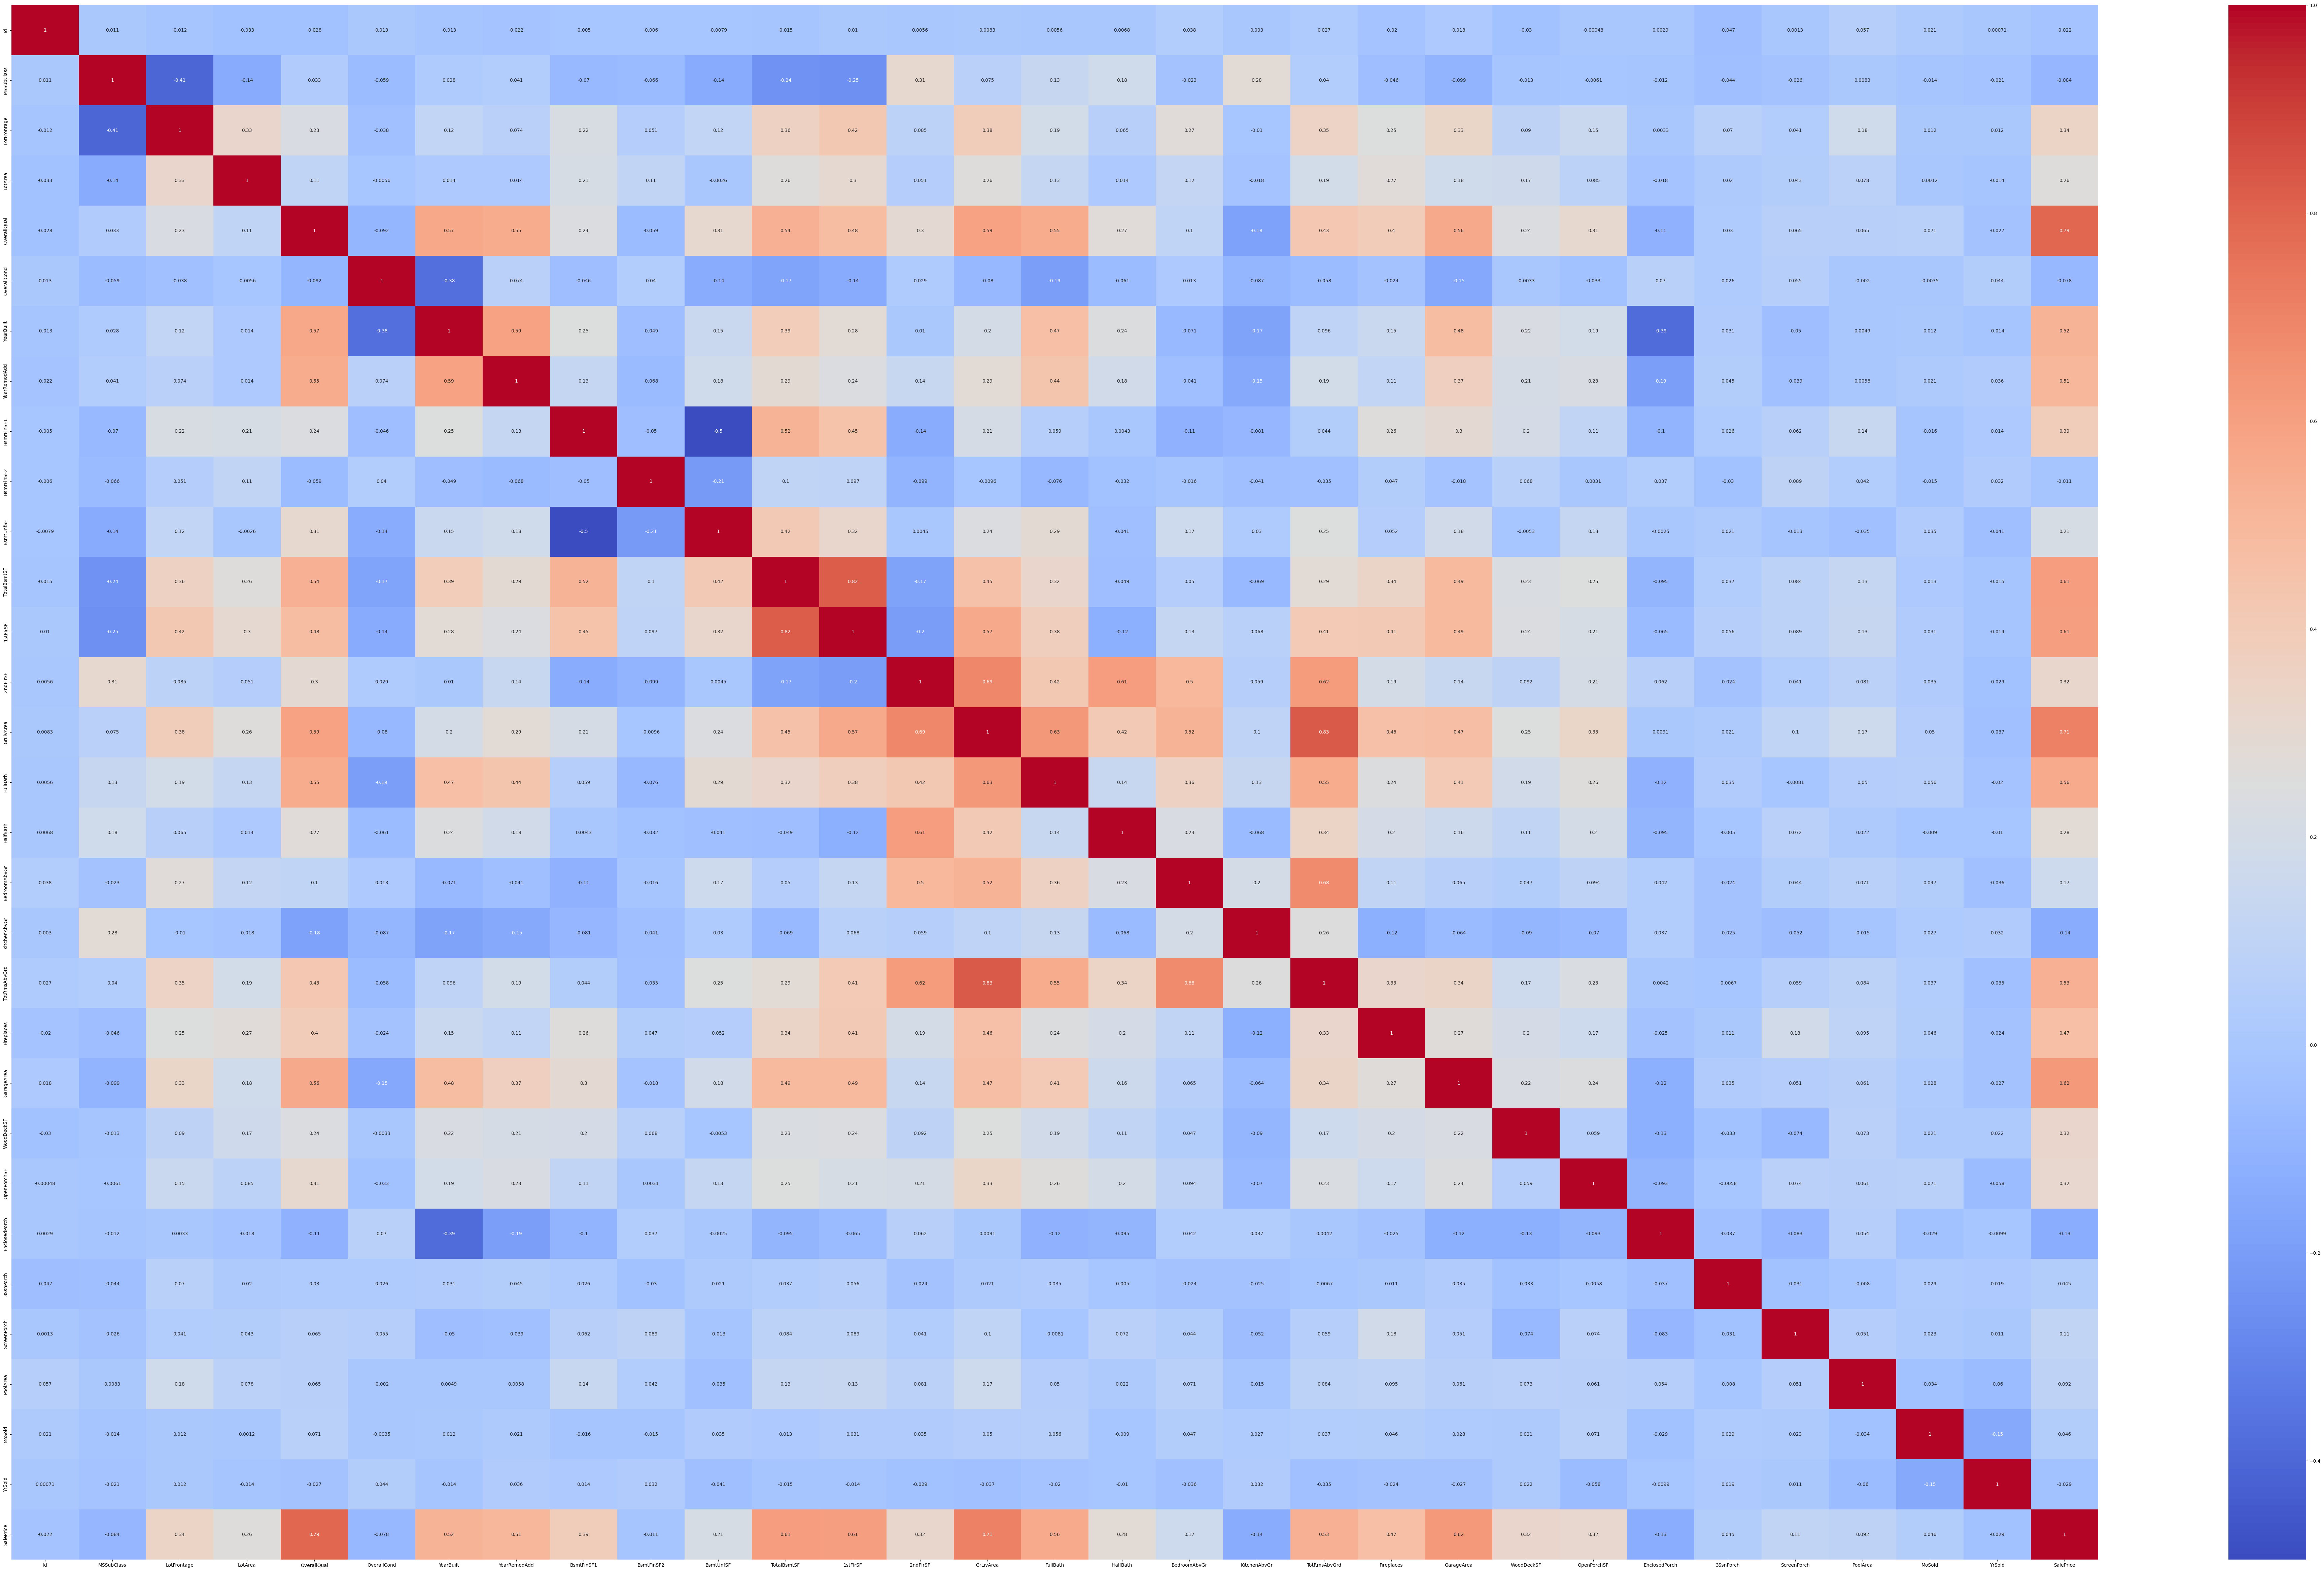

In [224]:
# Numercial columns
# Pearson correlation
plt.figure(figsize=(100,60))
sns.heatmap(train_correlation_matrix, annot=True, cmap = 'coolwarm')
plt.show()

In [225]:
#chi contignecy for categorical columns
categorical_columns = house_train.select_dtypes(exclude=np.number).columns
categorical_columns
chi_result = []

for rec in categorical_columns:
    contingency_table = pd.crosstab(house_train[rec], pd.qcut(house_train['SalePrice'], q=4))
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_result.append([rec, chi2, p, dof])

chi_result_df = pd.DataFrame(chi_result, columns=['feature', 'chi2', 'p', 'dof'])
display(chi_result_df)

,feature,chi2,p,dof
0,MSZoning,309.013344,6.002757e-59,12
1,Street,6.028478,1.102329e-01,3
2,LotShape,147.863558,2.442677e-27,9
3,LandContour,45.027748,9.118229e-07,9
4,Utilities,2.980243,3.946814e-01,3
5,LotConfig,40.182262,6.706733e-05,12
6,LandSlope,11.054732,8.669953e-02,6
7,Neighborhood,1214.306130,5.542657e-207,72
8,Condition1,103.305899,8.158016e-12,24
9,Condition2,29.074553,1.122231e-01,21


In [226]:
house_test = pd.read_csv('test.csv')

In [227]:
house_test.drop(['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure'], axis=1, inplace=True)
house_test['BsmtFinType1'].fillna('NB', inplace=True)
house_test['BsmtFinType2'].fillna('NB', inplace=True)
house_test['Electrical'].fillna(house_test['Electrical'].mode()[0], inplace=True)
house_test.drop('LowQualFinSF', axis=1, inplace=True)
house_test.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)
house_test['FireplaceQu'].fillna('NF', inplace=True)
house_test['GarageCond'].fillna('NG', inplace=True)
house_test.drop(['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars'], axis=1, inplace=True)
house_test['PoolQC'].fillna('NP', inplace=True)
house_test['Fence'].fillna('NF', inplace=True)
house_test.drop(['MiscFeature', 'MiscVal'], axis=1, inplace=True)

house_test['LotFrontage'].fillna(house_test.groupby(['MSSubClass', 'MSZoning', 'Street'])['LotFrontage'].transform('mean'), inplace=True)
house_test['LotFrontage'].fillna(house_test.groupby(['MSZoning', 'Street'])['LotFrontage'].transform('mean'), inplace=True)
house_test['LotFrontage'].fillna(house_test.groupby(['Street'])['LotFrontage'].transform('mean').round(2), inplace=True)

# Fill MSZoning with mode obtained from that column itself
house_test['MSZoning'].fillna(house_test['MSZoning'].mode()[0], inplace=True)

house_test['Utilities'].fillna('AllPub', inplace=True)

house_test['Exterior1st'].fillna('HdBoard', inplace = True)

house_test['Exterior2nd'].fillna('HdBoard', inplace = True)

# Since there is NoBasement (NB) filling BsmtFinSF1 = 0, BsmtFinSF2 = 0, BsmtUnfSF = 0, TotalBsmtSF = 0
house_test['BsmtFinSF1'].fillna(0, inplace=True)
house_test['BsmtFinSF2'].fillna(0, inplace=True)
house_test['BsmtUnfSF'].fillna(0, inplace=True)
house_test['TotalBsmtSF'].fillna(0, inplace=True)

house_test['KitchenQual'].fillna('TA', inplace=True)

house_test['Functional'].fillna('Typ', inplace=True)

house_test['GarageArea'].fillna(0, inplace=True)

house_test['SaleType'].fillna('WD', inplace=True)

In [228]:
house_test[ (house_test['ExterQual'] == 'TA') & (house_test['ExterCond'] == 'TA') ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,NP,MnPrv,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,NP,NF,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NP,MnPrv,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NP,NF,6,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,NP,NF,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NP,NF,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NP,NF,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NP,NF,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NP,MnPrv,7,2006,WD,Normal


In [229]:
house_test[['KitchenAbvGr', 'KitchenQual']][house_test['KitchenQual'].isnull()]

,KitchenAbvGr,KitchenQual


In [230]:
#house_test[['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars']][house_test['GarageArea'].isnull()]

In [231]:
house_test['SaleType'].value_counts()

,count
SaleType,
WD,1259
New,117
COD,44
ConLD,17
CWD,8
Oth,4
ConLI,4
ConLw,3
Con,3


In [232]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [233]:
target = 'SalePrice'
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition']
X = house_train[features]
y = house_train[target]

X_test = house_test[features]
numerical_columns = X.select_dtypes(include=np.number).columns
categorical_columns = X.select_dtypes(exclude=np.number).columns

In [234]:
preprocesser = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

linear_pipeline = Pipeline([
    ('preprocesser', preprocesser),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

linear_pipeline.fit(X, y)
y_pred = linear_pipeline.predict(X)

In [235]:
# use SGD regressor to fit the model
from sklearn.linear_model import SGDRegressor
sgd_pipeline = Pipeline([
    ('preprocesser', preprocesser),
    ('model', SGDRegressor())
])

sgd_pipeline.fit(X, y)
y_pred_sgd = sgd_pipeline.predict(X)

In [236]:
from sklearn.metrics import r2_score # Re-import r2_score to ensure it's a function
r2_linear_score_val = r2_score(y, y_pred)
print("R2 Score (Linear Regression):", r2_linear_score_val)

R2 Score (Linear Regression): 0.9999962591621573


In [237]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

RMSE: 153.59906707361165


In [238]:
predictions = linear_pipeline.predict(X_test)

predictions = np.clip(predictions, 0, None)

submission = pd.DataFrame({
    'Id': house_test['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission_15112025_polynomial.csv', index=False)

In [239]:
from sklearn.metrics import r2_score # Re-import r2_score to ensure it's a function
r2_sgd_score_val = r2_score(y, y_pred_sgd)
print("R2 Score (SGD Regressor):", r2_sgd_score_val)

R2 Score (SGD Regressor): 0.8673849932218872


In [240]:
rmse_sgd = np.sqrt(mean_squared_error(y, y_pred_sgd))
print("RMSE:", rmse_sgd)

RMSE: 28920.14541793007


In [241]:
predictions_sgd = sgd_pipeline.predict(X_test)

predictions_sgd = np.clip(predictions_sgd, 0, None)

submission = pd.DataFrame({
    'Id': house_test['Id'],
    'SalePrice': predictions_sgd
})

submission.to_csv('submission_sgd.csv', index=False)

In [242]:
house_test.shape

(1459, 64)

In [243]:
y_pred.shape

(1460,)

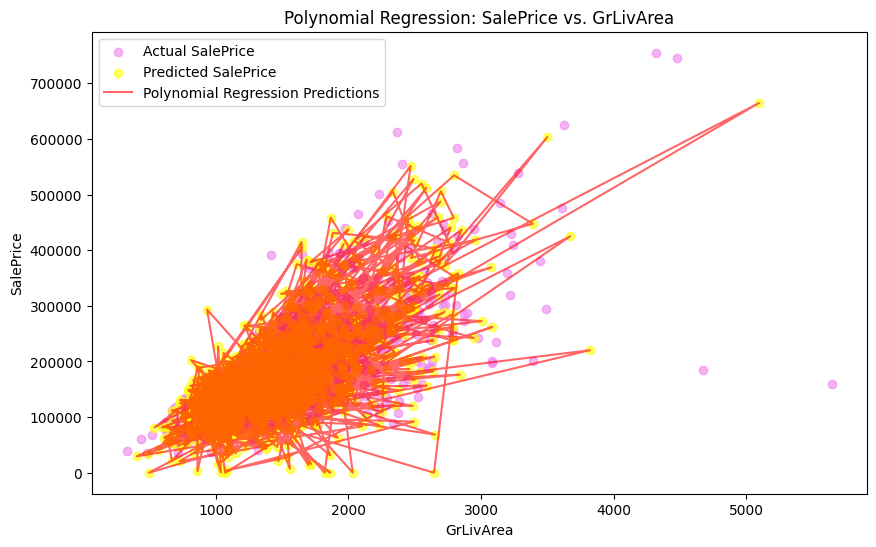

In [247]:
plt.figure(figsize=(10, 6))
plt.scatter(x=house_train['GrLivArea'], y=house_train['SalePrice'], label='Actual SalePrice', color='violet', alpha=0.6)
plt.scatter(x=house_test['GrLivArea'], y=predictions, label='Predicted SalePrice', color='yellow', alpha=0.6)
plt.plot(house_test['GrLivArea'], predictions, label='Polynomial Regression Predictions', color='red', alpha=0.6)
plt.title('Polynomial Regression: SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=house_train['MSSubClass'], y=house_train['SalePrice'], label='Actual SalePrice', color='violet', alpha=0.6)
plt.plot(house_train['MSSubClass'], y_pred, label='Polynomial Regression Predictions', color='red', alpha=0.6)
plt.title('Polynomial Regression: SalePrice vs. MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.legend()
plt.show()